# Cherry Blossoms

Experimenting with data about cherry blossom bloom and peak times in Japan. 62 years of data in 2 tables. Possible comparing with data from Washington DC. The data is originally from the Japan Meterological Agency, acquired through Kaggle.

I want to know if there are any trends happening throughout Japan in regards to bloom or peak time, and the interval between them. If they are blooming earlier or later. If comparing to DC, I would like to see if it follows this trend and if there is anywhere in Japan whose bloom and peak times line up with DC.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

D:\Users\jryba\anaconda3\envs\DataAnalyticsCourse\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
blossom = pd.read_csv('cherry_blossoms/sakura_first_bloom_dates.csv')
blossom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Site Name                  102 non-null    object
 1   Currently Being Observed   102 non-null    bool  
 2   1953                       79 non-null     object
 3   1954                       81 non-null     object
 4   1955                       82 non-null     object
 5   1956                       84 non-null     object
 6   1957                       83 non-null     object
 7   1958                       83 non-null     object
 8   1959                       86 non-null     object
 9   1960                       85 non-null     object
 10  1961                       86 non-null     object
 11  1962                       88 non-null     object
 12  1963                       89 non-null     object
 13  1964                       88 non-null     object
 14  1965      

In [3]:
bloom = pd.read_csv('cherry_blossoms/sakura_full_bloom_dates.csv')
bloom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 72 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Site Name                  102 non-null    object
 1   Currently Being Observed   102 non-null    bool  
 2   1953                       75 non-null     object
 3   1954                       79 non-null     object
 4   1955                       79 non-null     object
 5   1956                       80 non-null     object
 6   1957                       82 non-null     object
 7   1958                       84 non-null     object
 8   1959                       85 non-null     object
 9   1960                       84 non-null     object
 10  1961                       82 non-null     object
 11  1962                       87 non-null     object
 12  1963                       87 non-null     object
 13  1964                       85 non-null     object
 14  1965      

Immediately we run into a problem, there is a lot of null data. Out of 102 locations, only 2 have no null values on both tables.

In [4]:
blossom= blossom.drop(['Currently Being Observed','1953','1954','1956','1957','1958','1959','1961','1962',
                        '1963','1964','1966','1967','1968','1968','1971','1972',
                        '1973','1974','1976','1977','1978','1978','1981','1982',
                        '1983','1984','1986','1987','1988','1989','1991','1992',
                        '1993','1994','1996','1997','1998','1999','2001','2002',
                        '2003','2004','2006','2007','2008','2009','2011','2012',
                        '2013','2014','2016','2017','2018','2019','Notes'], axis=1)
blossom.head()

,Site Name,1955,1960,1965,1969,1970,1975,1979,1980,1985,1990,1995,2000,2005,2010,2015,2020,30 Year Average 1981-2010
0,Wakkanai,1955-05-17,1960-05-19,1965-05-18,NaN,NaN,1975-05-19,1979-05-21,1980-05-25,1985-05-13,1990-05-06,1995-05-08,2000-05-18,2005-05-23,2010-05-22,2015-05-03,2020-05-10,5 14
1,Rumoi,1955-05-13,NaN,1965-05-18,1969-05-16,1970-05-09,1975-05-08,1979-05-17,1980-05-20,1985-05-11,1990-04-26,1995-05-05,2000-05-13,2005-05-20,NaN,NaN,NaN,-
2,Asahikawa,1955-05-09,1960-05-13,1965-05-15,1969-05-06,1970-05-07,1975-05-08,1979-05-12,1980-05-16,1985-05-03,1990-04-28,1995-05-02,2000-05-09,2005-05-14,2010-05-11,2015-04-27,2020-05-03,5 5
3,Abashiri,1955-05-18,NaN,1965-05-17,1969-05-09,1970-05-08,1975-05-14,1979-05-24,1980-05-21,1985-05-10,1990-05-07,1995-05-08,2000-05-18,2005-05-21,2010-05-17,2015-04-30,2020-05-07,5 11
4,Sapporo,1955-05-11,1960-05-05,1965-05-13,1969-05-05,1970-05-03,1975-05-04,1979-05-09,1980-05-14,1985-05-03,1990-04-25,1995-05-01,2000-05-08,2005-05-10,2010-05-07,2015-04-22,2020-04-30,5 3


In [5]:
blossom=blossom.dropna()
blossom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 89
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Site Name                  48 non-null     object
 1   1955                       48 non-null     object
 2   1960                       48 non-null     object
 3   1965                       48 non-null     object
 4   1969                       48 non-null     object
 5   1970                       48 non-null     object
 6   1975                       48 non-null     object
 7   1979                       48 non-null     object
 8   1980                       48 non-null     object
 9   1985                       48 non-null     object
 10  1990                       48 non-null     object
 11  1995                       48 non-null     object
 12  2000                       48 non-null     object
 13  2005                       48 non-null     object
 14  2010        

In [6]:
blossom.head(50)

,Site Name,1955,1960,1965,1969,1970,1975,1979,1980,1985,1990,1995,2000,2005,2010,2015,2020,30 Year Average 1981-2010
2,Asahikawa,1955-05-09,1960-05-13,1965-05-15,1969-05-06,1970-05-07,1975-05-08,1979-05-12,1980-05-16,1985-05-03,1990-04-28,1995-05-02,2000-05-09,2005-05-14,2010-05-11,2015-04-27,2020-05-03,5 5
4,Sapporo,1955-05-11,1960-05-05,1965-05-13,1969-05-05,1970-05-03,1975-05-04,1979-05-09,1980-05-14,1985-05-03,1990-04-25,1995-05-01,2000-05-08,2005-05-10,2010-05-07,2015-04-22,2020-04-30,5 3
6,Obihiro,1955-05-10,1960-05-11,1965-05-15,1969-05-07,1970-05-10,1975-05-12,1979-05-11,1980-05-14,1985-05-03,1990-05-01,1995-05-04,2000-05-10,2005-05-04,2010-05-08,2015-04-26,2020-05-02,5 4
9,Muroran,1955-05-18,1960-05-08,1965-05-16,1969-05-07,1970-05-14,1975-05-08,1979-05-12,1980-05-15,1985-05-10,1990-04-26,1995-05-05,2000-05-15,2005-05-10,2010-05-14,2015-04-28,2020-05-01,5 6
12,Hakodate,1955-05-08,1960-05-04,1965-05-14,1969-05-05,1970-05-06,1975-05-01,1979-05-07,1980-05-12,1985-05-04,1990-04-22,1995-04-30,2000-05-03,2005-05-01,2010-05-05,2015-04-21,2020-04-26,4 30
19,Akita,1955-04-16,1960-04-21,1965-04-30,1969-04-25,1970-04-27,1975-04-21,1979-04-18,1980-04-23,1985-04-19,1990-04-10,1995-04-18,2000-04-20,2005-04-24,2010-04-24,2015-04-11,2020-04-08,4 18
20,Morioka,1955-04-18,1960-04-27,1965-05-04,1969-04-26,1970-04-28,1975-04-24,1979-04-24,1980-04-28,1985-04-25,1990-04-13,1995-04-24,2000-04-22,2005-04-23,2010-04-25,2015-04-09,2020-04-14,4 21
23,Yamagata,1955-04-12,1960-04-17,1965-04-26,1969-04-20,1970-04-24,1975-04-17,1979-04-12,1980-04-21,1985-04-19,1990-04-09,1995-04-17,2000-04-19,2005-04-19,2010-04-19,2015-04-10,2020-04-03,4 15
24,Sendai,1955-04-11,1960-04-12,1965-04-20,1969-04-14,1970-04-21,1975-04-14,1979-04-09,1980-04-14,1985-04-17,1990-04-03,1995-04-11,2000-04-13,2005-04-14,2010-04-13,2015-04-03,2020-03-28,4 11
25,Fukushima,1955-04-09,1960-04-08,1965-04-18,1969-04-13,1970-04-19,1975-04-11,1979-04-08,1980-04-13,1985-04-14,1990-04-03,1995-04-09,2000-04-13,2005-04-11,2010-04-09,2015-04-02,2020-03-28,4 9


In [7]:
bloom= bloom.drop(['Currently Being Observed','1953','1954','1956','1957','1958','1959','1961','1962',
                        '1963','1964','1966','1967','1968','1969','1971','1972',
                        '1973','1974','1976','1977','1978','1979','1981','1982',
                        '1983','1984','1986','1987','1988','1989','1991','1992',
                        '1993','1994','1996','1997','1998','1999','2001','2002',
                        '2003','2004','2006','2007','2008','2009','2011','2012',
                        '2013','2014','2016','2017','2018','2019','Notes'], axis=1)
bloom.head()

,Site Name,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,30 Year Average 1981-2010
0,Wakkanai,1955-05-23,1960-05-24,1965-05-22,NaN,1975-05-22,1980-05-27,1985-05-17,1990-05-09,1995-05-11,2000-05-21,2005-05-28,2010-05-25,2015-05-06,2020-05-12,5 17
1,Rumoi,1955-05-16,NaN,1965-05-23,1970-05-11,1975-05-12,1980-05-22,1985-05-13,1990-05-01,1995-05-09,2000-05-17,2005-05-23,NaN,NaN,NaN,-
2,Asahikawa,1955-05-14,1960-05-16,1965-05-19,1970-05-10,1975-05-12,1980-05-19,1985-05-06,1990-05-03,1995-05-04,2000-05-11,2005-05-17,2010-05-13,2015-04-28,2020-05-04,5 7
3,Abashiri,1955-05-20,NaN,NaN,1970-05-10,1975-05-17,1980-05-23,1985-05-12,1990-05-09,1995-05-10,2000-05-21,2005-05-25,2010-05-18,2015-05-03,2020-05-09,5 14
4,Sapporo,1955-05-16,1960-05-09,1965-05-16,1970-05-09,1975-05-08,1980-05-18,1985-05-08,1990-04-29,1995-05-03,2000-05-11,2005-05-16,2010-05-14,2015-04-26,2020-05-02,5 7


In [8]:
bloom=bloom.dropna()
bloom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 2 to 90
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Site Name                  48 non-null     object
 1   1955                       48 non-null     object
 2   1960                       48 non-null     object
 3   1965                       48 non-null     object
 4   1970                       48 non-null     object
 5   1975                       48 non-null     object
 6   1980                       48 non-null     object
 7   1985                       48 non-null     object
 8   1990                       48 non-null     object
 9   1995                       48 non-null     object
 10  2000                       48 non-null     object
 11  2005                       48 non-null     object
 12  2010                       48 non-null     object
 13  2015                       48 non-null     object
 14  2020        

In [9]:
bloom.head(50)

,Site Name,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,30 Year Average 1981-2010
2,Asahikawa,1955-05-14,1960-05-16,1965-05-19,1970-05-10,1975-05-12,1980-05-19,1985-05-06,1990-05-03,1995-05-04,2000-05-11,2005-05-17,2010-05-13,2015-04-28,2020-05-04,5 7
4,Sapporo,1955-05-16,1960-05-09,1965-05-16,1970-05-09,1975-05-08,1980-05-18,1985-05-08,1990-04-29,1995-05-03,2000-05-11,2005-05-16,2010-05-14,2015-04-26,2020-05-02,5 7
6,Obihiro,1955-05-14,1960-05-15,1965-05-17,1970-05-13,1975-05-14,1980-05-16,1985-05-06,1990-05-04,1995-05-07,2000-05-12,2005-05-10,2010-05-11,2015-04-28,2020-05-03,5 7
7,Kushiro,1955-05-26,1960-05-28,1965-05-25,1970-05-21,1975-05-24,1980-05-28,1985-05-20,1990-05-12,1995-05-18,2000-05-21,2005-05-26,2010-05-22,2015-05-08,2020-05-13,5 20
9,Muroran,1955-05-23,1960-05-14,1965-05-20,1970-05-16,1975-05-11,1980-05-18,1985-05-18,1990-05-02,1995-05-09,2000-05-17,2005-05-20,2010-05-18,2015-05-01,2020-05-05,5 11
12,Hakodate,1955-05-14,1960-05-10,1965-05-16,1970-05-11,1975-05-07,1980-05-15,1985-05-09,1990-04-26,1995-05-03,2000-05-08,2005-05-05,2010-05-10,2015-04-24,2020-05-01,5 4
19,Akita,1955-04-23,1960-04-27,1965-05-08,1970-05-01,1975-04-25,1980-04-28,1985-04-23,1990-04-13,1995-04-23,2000-04-25,2005-04-28,2010-04-28,2015-04-15,2020-04-15,4 22
20,Morioka,1955-04-27,1960-04-29,1965-05-08,1970-05-01,1975-04-28,1980-05-04,1985-04-29,1990-04-21,1995-04-28,2000-04-29,2005-04-27,2010-05-02,2015-04-16,2020-04-20,4 25
23,Yamagata,1955-04-15,1960-04-24,1965-05-02,1970-04-28,1975-04-22,1980-04-27,1985-04-22,1990-04-12,1995-04-21,2000-04-24,2005-04-23,2010-04-25,2015-04-15,2020-04-09,4 19
24,Sendai,1955-04-16,1960-04-17,1965-04-25,1970-04-25,1975-04-18,1980-04-20,1985-04-23,1990-04-08,1995-04-17,2000-04-18,2005-04-17,2010-04-21,2015-04-09,2020-04-03,4 16


By reducing the number of columns, I cut down on the number of rows with null data. I can use data from every 5 years and still have about 50 rows I can use. I also cut the 'currently being observed' row because all the remaining cities had the same answer; yes.

The data is sorted from north to south, but if I want to compare the dates to location, I will need some longitude/latitude data.

<AxesSubplot:xlabel='30 Year Average 1981-2010', ylabel='Count'>

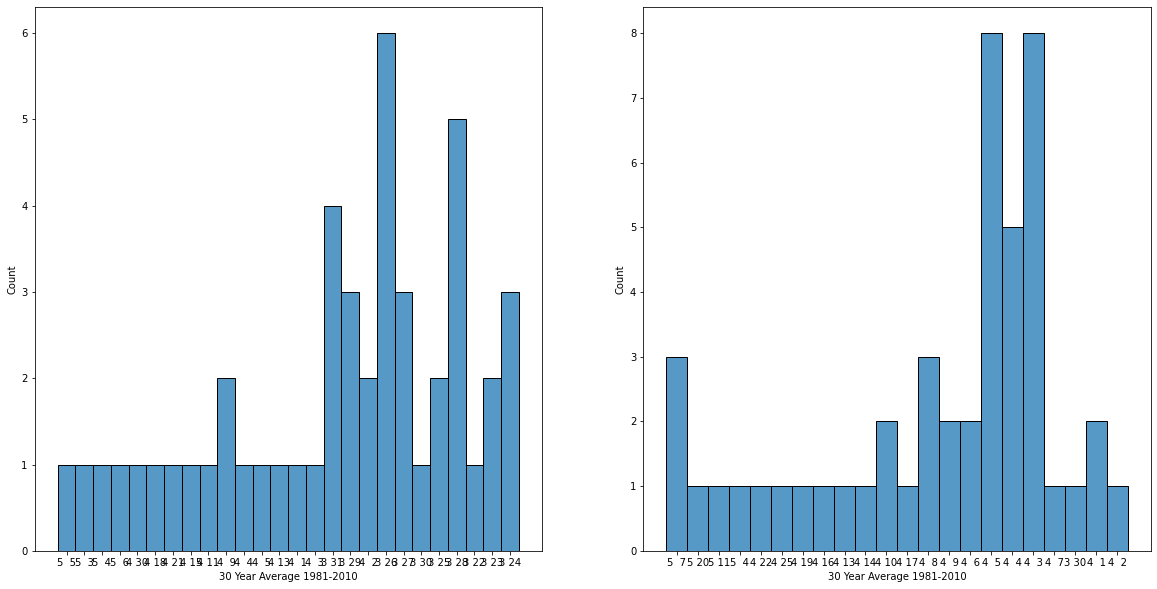

In [70]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.histplot(x=blossom['30 Year Average 1981-2010'],ax=ax1)
sns.histplot(x=bloom['30 Year Average 1981-2010'],ax=ax2)

<AxesSubplot:xlabel='2020', ylabel='Count'>

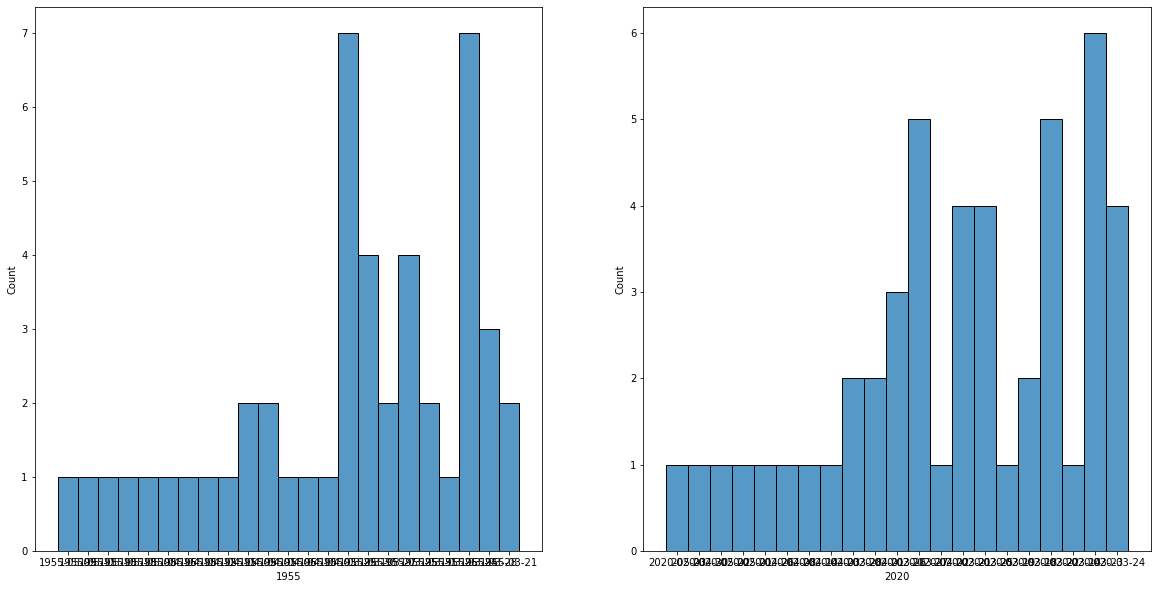

In [71]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
sns.histplot(x=blossom['1955'],ax=ax1)
sns.histplot(x=blossom['2020'],ax=ax2)